<a href="https://colab.research.google.com/github/LeNovice/PSW/blob/main/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset and describe it.

In [189]:
data = pd.read_csv("https://raw.githubusercontent.com/PinakW/Chronic_Kidney_disease/main/Iris.csv", index_col=0)
iris_df = pd.DataFrame(data)
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Split the data as per 80:20 ratios of training and test set.

In [190]:
X = iris_df.iloc[:, 0:4]
y = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

3. Normalize the dataset. Visualize the dataset before and after normalization.

In [191]:
#For nominal attribute encoding to numerical values and Normalization of Numberical attributes
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [192]:
# Plot before Normalization
#pre_norm = sns.pairplot(iris_df, hue= 'Species')
#pre_norm.fig.suptitle('Visualization of dataset before normalization:', y = 1.05)

# Normalize X
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

# Encode y to Nominal values
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
y_train_encoded = labelencoder.transform(y_train)

# Create dataframe for normalized features and target
iris_df_after = pd.DataFrame(data = np.c_[X_train_normalized, y_train_encoded], columns = iris_df.columns)

# Map the nominal values of y to their real names for plotting purpose
map = {0.0 : 'Iris - setosa', 1.0 : 'Iris - versicolor', 2.0 : 'Iris - virginica'}

# Plot after normalization
#post_norm = sns.pairplot(iris_df_after.replace({'Species': map}), hue = 'Species')
#post_norm.fig.suptitle('Visualization of dataset after normalization:', y = 1.05)

In [193]:
# #delete later:
# train_DF = X_train_normalized
# display(train_DF)
# train_DF = train_DF.merge(y_train_encoded, left_index=True, right_index=True)
# #train_DF = X_train_normalized.join(y_train_encoded)
# train_DF.plot.scatter(x = 'SepalWidthCm', y = y_train_encoded.name)        #SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm

4. Calculate Similarity based on distance function of your choice

In [194]:
 #Euclidean distance between two datapoints
def Euclid_distance(dt_pt1, dt_pt2):
    """
    Input:
        Two Data points which are basically two row entries in the DataFrame
    Output:
        Euclidean Distance between them
    """
    #Check if both the data points have same columns (Attributes):
    if(len(dt_pt1) != len(dt_pt2)):
        exit("Euclid_distance: Data points inconsistent. Received Data points with different attributes")
    current_distance = 0
    for col in range(len(dt_pt1)):
        ## Loop over the columns of the row
        current_distance += (dt_pt1[col] - dt_pt2[col]) **2
        ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2

    return np.sqrt(current_distance)

5. Define a function to return k- nearest neighbors

In [195]:
from heapq import heappush, heappop
#import numpy as np

In [196]:
def Nearest_K(x_train, x_test_point, K=5):
    """
    Input:
        x_train: Input training data
        x_test_point: test point which is to be classified (x_test_point)
    Output:
        Indices of nearest K neighbours corresponding to x_test_point
    """
    ## Create a min-heap of tuple: (distance, index) for x_test_point against every other training point
    #tuple_distance_index is a min-heap compared w.r.t distance first and then index.
    tuple_distance_index = [] 
    for index, row in enumerate(x_train):
        heappush(tuple_distance_index, (Euclid_distance(row , x_test_point), index))
    #Indices of K-nearest array corresponding to x_test_point:
    KNN_array = []
    for i in range(K):
        KNN_array.append(heappop(tuple_distance_index)[-1])
    return KNN_array

In [197]:
def predict_y(y_train, KNN_array_indices):
    """
    predicts the value based on majority of neighbouring classes.
    Input 
        Indices which are nearest to given point.
    Output
        The predicted value of given point
    """
    y_vals = y_train[KNN_array_indices]
    #hash_array will house the number of occurences of each class
    hash_array = []
    #find the maximum occuring elemnt in y_vals
    for j in range(len(np.unique(y_train))):
        hash_array.append(0)
    for i in y_vals:
        hash_array[i] = hash_array[i] + 1
    return hash_array.index(max(hash_array))


In [198]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    KNN implementation from scratch. 
    Input:
        Normalized train and test X.
        Encoded train Y 
    Output:
        An array of predicted class values.
    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
        KNN_array_indices = Nearest_K(x_train, x_test_point, K)
        y_pred.append(predict_y(y_train, KNN_array_indices))
    return y_pred



6. Test the KNN Algorithm on the test dataset

In [199]:
from sklearn.metrics import accuracy_score

#Normalize test using Train fit
X_test_normalized = scaler.transform(X_test)
#Encode test using Train fit
y_test_encoded = labelencoder.transform(y_test)

K=3
y_pred_scratch= KNN_from_scratch(X_train_normalized, y_train_encoded, X_test_normalized, K)
print(y_pred_scratch)
accuracy_score(y_test_encoded, y_pred_scratch)

[1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2]


0.9666666666666667

7. Compare your implementation with sklearn library. Also calculate the accuracy of both methods. Bring out your inference about both methods.

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(K)
knn.fit(X_train_normalized, y_train_encoded)
y_pred_sklearn= knn.predict(X_test_normalized)
print(y_pred_sklearn)
accuracy_score(y_test_encoded, y_pred_sklearn)

[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


0.9666666666666667

8. Repeat the procedure with different values of K and find the best value.

Text(0, 0.5, 'Error Rate')

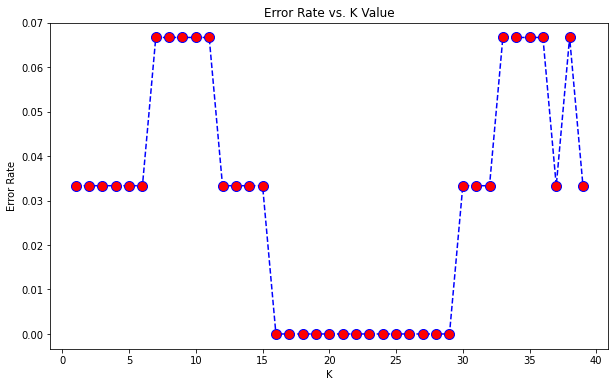

In [201]:
import matplotlib.pyplot as plt

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_normalized,y_train_encoded)
    pred_i = knn.predict(X_test_normalized)
    error_rate.append(np.mean(pred_i != y_test_encoded))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

9. Perform hyper-parameter tuning using K-fold Cross Validation

In [202]:

n_splits = 5 ## Choose the number of splits
kf = KFold(n_splits= n_splits, random_state=10, shuffle=True) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(X_train_normalized): ## Loop over the splits
      normalized_x_train_fold= X_train_normalized[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold = y_train_encoded[normalized_x_train_fold_idx]

      normalized_x_test_fold= X_train_normalized[normalized_x_valid_fold_idx]
      y_valid_fold= y_train_encoded[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)

print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}')

print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

The accuracy for each K value was [(0.925, 1), (0.95, 3), (0.9416666666666668, 5), (0.95, 7), (0.95, 9), (0.95, 11), (0.95, 13), (0.95, 15), (0.925, 17), (0.9333333333333332, 19), (0.925, 21), (0.9166666666666666, 23), (0.9, 25), (0.8916666666666668, 27), (0.9, 29)]
Best accuracy was 0.95, which corresponds to a value of K= 3


10. Use the test set and the optimal hyper-parameters to compute the final accuracy.

In [204]:
K=k_values[np.argmax(accuracy_k)]
print(f"Accuracy corresponding to K = {K}")
y_pred_scratch= KNN_from_scratch(X_train_normalized, y_train_encoded, X_test_normalized, K)
print(y_pred_scratch)
accuracy_score(y_test_encoded, y_pred_scratch)

Accuracy corresponding to K = 3
[1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2]


0.9666666666666667